# I. Import the libraries/dataset

In [29]:
import pandas as pd
import plotly.express as px
import numpy as np

#Scikit learn models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


# Evaluate the model
from sklearn.metrics import classification_report,f1_score,precision_recall_fscore_support


In [164]:
df_train = pd.read_csv("dataset/sat.trn", sep = " ",header=None)
df_test = pd.read_csv("dataset/sat.tst", sep = " ",header=None)

# II. Data exploration

## 1. Contenu du dataset

- La base de donnée consiste a des  valeurs multi spectrale de pixels dans une image satellite. La classe à prédire et le pixel central dans chaque groupe de voisins. La classe à prédire à été transformé et pour des raisons de facilité à des valeurs entre 1 et 7.
Nous avons 4435 valeurs dans le training set et 2000 dans le testing set.

- Chaque image prise par le satellite landsat consiste en 4 différentes images de la meme scène mais prise dans des valeurs spectrales différentes (2 dans le domaine du visible et 2 dans l'infrarouge). Chaque image à une résolution de 2340 x 3380 

- Dans notre dataset, on à une petite partie de l'image (82 x 100 pixels) 

Sur le schéma ci-dessous j'ai représenté 1 ligne du dataframe. La ligne répresente en fait 1 pixel (rouge) qu'on cherche à prédire, ainsi que ces voisins. Comme on peut le voir les pixels sont mis à la ligne les uns a la suite des autres, et chaque pixels est représenté par 4 valeurs entre 0 et 255.

![Getting Started](pixels.png)

C'est un problème de multi classififcation, le but étant de savoir si le pixel de l'image, correspond à de la terre grise, rouge ou des vegetaux etc...

## 2. Classe à prédire

Tout d'abord en regardant les labels, et le nombre dans chaque classe, on se rend compte que elles ne sont pas bien répartis ce qui peut poser plusieurs problèmes
- L'accuracy n'est pas une bonne metrics pour vérifier notre classification 

Nous allons donc utiliser d'autres metrics pour vérifier la prédiction de notre algortihme 
- confusion matrix 
- score F1 (qui est une moyenne de la précision et du rappel) 
- ROC curve

In [111]:
def plot(df):
    index = count = df.iloc[:,36].value_counts().index.to_list()
    count = df.iloc[:,36].value_counts().to_list()
    count.append(0)
    index.append(0)
    count_df = df.iloc[:,36].value_counts().to_frame()
    count_df.loc[6]= 0
    count_df.sort_index(inplace = True)
    bins_label = ["1. red soil","2. cotton crop","3. grey soil","4. damp grey soil","5. soil with vegetation stubble","mixture class (all types present)","7. very damp grey soil"]
    count_df["labels"] = bins_label

    fig = px.bar(count_df, x=bins_label, y=36, labels={'x':'Labels', 'y':'Count'})
    fig.show()
plot(df_train)

In [2]:
def line_plot(x,y,title):
    fig = px.line( x=x, y=y, title=title)
    fig.show()

# III. Models

On définit le la matrice test x pour les valeurs et y pour les labels

In [165]:
df_train[df_train.iloc[:,36] == 7] = 6 
df_test[df_test.iloc[:,36] == 7] = 6 

In [166]:
df_test.iloc[:,36].value_counts()

6    470
1    461
3    397
5    237
2    224
4    211
Name: 36, dtype: int64

In [179]:
x_train = df_train.iloc[:,:36]
y_train = df_train.iloc[:,36]


In [11]:
x_test = df_test.iloc[:,:36]
y_test = df_test.iloc[:,36]

Nous allons tester plusieurs modèles pour répondre à ce problème, et compararer les résultats entre eux.

In [30]:
f1_score_weighted_avg = []
algo_used = []

## 1. KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [13]:
y_pred = knn.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.97      0.98       224
           3       0.90      0.94      0.92       397
           4       0.73      0.69      0.71       211
           5       0.90      0.87      0.89       237
           7       0.87      0.87      0.87       470

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



In [23]:
algo_used.append("KNN")


score = f1_score(y_test,y_pred, average='weighted')
f1_score_weighted_avg.append(round(score,3))
f1_score_weighted_avg

[0.904]

## 2. Decision tree

In [24]:
clf = DecisionTreeClassifier(criterion = "gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       461
           2       0.97      0.97      0.97       224
           3       0.89      0.87      0.88       397
           4       0.56      0.60      0.58       211
           5       0.84      0.79      0.81       237
           7       0.84      0.83      0.83       470

    accuracy                           0.85      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.86      0.85      0.86      2000



In [28]:
algo_used.append("Decision tree")

score = f1_score(y_test,y_pred, average='weighted')
f1_score_weighted_avg.append(round(score,3))
f1_score_weighted_avg

[0.904, 0.856]

## 2. Random Forest

On va minatenant utiliser le random Forst pour essayer d'augmenter la classification. 

In [99]:
clf = RandomForestClassifier(max_depth= 40, min_samples_split= 10, n_estimators= 25)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=25)

In [100]:
y_pred = clf.predict(x_test)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.78      0.63      0.70       211
           5       0.92      0.89      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.90      2000



In [38]:
#test 1 : n_estimators(1,200) opt = 50
list_scores = []

n_estimators = 200
for i in range(1,n_estimators):
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    score = f1_score(y_test,y_pred, average='weighted')
    list_scores.append(score)

In [43]:
line_plot(range(1,200),list_scores,"Numbers of tree")

In [44]:
#test 1 : max_depth(0,200) opt 30
list_scores = []

max_depth = 200
for i in range(1,max_depth):
    clf = RandomForestClassifier(n_estimators = 50,max_depth=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    score = f1_score(y_test,y_pred, average='weighted')
    list_scores.append(score)

In [46]:
line_plot(range(1,200),list_scores,"Max depth of each tree")

In [47]:
#test 1 : min split(0,200) opt 3

list_scores = []

min_samples_split = 50
for i in range(2,min_samples_split):
    clf = RandomForestClassifier(n_estimators = 50,max_depth=30,min_samples_split = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    score = f1_score(y_test,y_pred, average='weighted')
    list_scores.append(score)

In [49]:
line_plot(range(2,50),list_scores,"Minimu number of sample to split")

In [52]:
algo_used.append("Random Forest")


clf = RandomForestClassifier(n_estimators = 50,max_depth=30,min_samples_split = 3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

score = f1_score(y_test,y_pred, average='weighted')
f1_score_weighted_avg.append(round(score,3))
f1_score_weighted_avg

[0.907]

### a voir si on garde

In [91]:
rf = RandomForestClassifier()#max_features='auto', oob_score=True, random_state=1, n_jobs=-1

#Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [15,25,35],
    'min_samples_split': [10,15,20],
    "max_depth" : [20,30,40]
}

In [95]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    2.7s finished


In [96]:
print(grid_search.best_params_)

{'max_depth': 40, 'min_samples_split': 10, 'n_estimators': 25}


In [123]:
n_estimators = np.linspace(1,30,30)
score_f1 = []
for estimator in n_estimators:
    clf = RandomForestClassifier(max_depth= 40, min_samples_split= 10, n_estimators= 25)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = precision_recall_fscore_support(y_test,y_pred,average='weighted')
    score_f1.append(score[0])

In [124]:
line_plot(n_estimators,score_f1,"")

## 4. Neural network

In [167]:
x_train = df_train.iloc[:,:36].values
y_train = df_train.iloc[:,36].values

x_test = df_test.iloc[:,:36].values
y_test = df_test.iloc[:,36].values

In [196]:
def get_class_distribution(obj):
    count_dict = {
        "1": 0,
        "2": 0,
        "3": 0,
        "4": 0,
        "5": 0,
        "6": 0,
    }
    
    for i in obj:
        if i == 1: 
            count_dict['1'] += 1
        elif i == 2: 
            count_dict['2'] += 1
        elif i == 3: 
            count_dict['3'] += 1
        elif i == 4: 
            count_dict['4'] += 1
        elif i == 5: 
            count_dict['5'] += 1  
        elif i == 6: 
            count_dict['6'] += 1 
            
        else:
            a=0
            #print("Check classes.")
            
    return count_dict
dic = get_class_distribution(y_train)
dic

{'1': 1072, '2': 479, '3': 961, '4': 415, '5': 470, '6': 1038}

Text(0.5, 1.0, 'Class Distribution in Test Set')

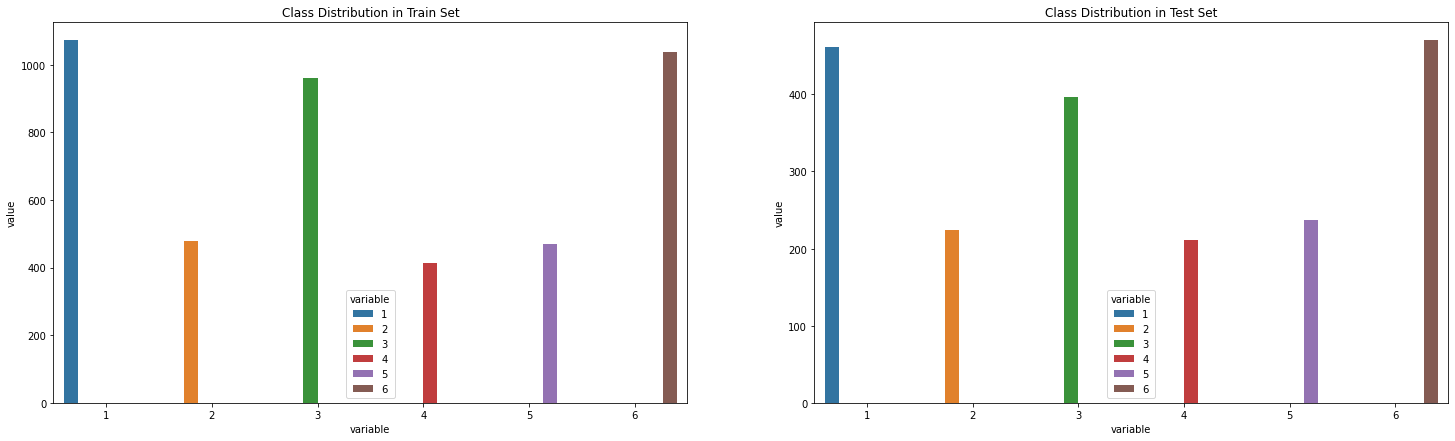

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')

### First we need to create a dataset of tensor
- x_train
- y_train
- x_test
- y_test

regarder si il faut mettre toutes les valeurs entre 0 et 1 dans x

In [168]:
from torch.utils.data import Dataset,DataLoader
import torch

In [169]:
class SatDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [170]:
train_dataset = SatDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).long())
test_dataset = SatDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).long())

In [225]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]
print(len(target_list))

4435


In [226]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0009, 0.0021, 0.0010, 0.0024, 0.0021, 0.0010])


In [227]:
class_weights_all = class_weights[target_list]

IndexError: index 6 is out of bounds for dimension 0 with size 6

### On va utiliser la fonction Softmax car nous avons un porblème de muti classification

In [188]:
EPOCHS = 20
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(x_train.columns)
NUM_CLASSES = 6

In [181]:
## Load the Dataset
train_loader = DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle =False)
val_loader = DataLoader(dataset = test_dataset, batch_size = 1, shuffle =False)

In [182]:
import torch.nn as nn
import torch.nn.functional as F

class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

### check gpu

In [183]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Parameters, otpimizer

In [184]:
import torch.optim as optim
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=36, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Train the model

In [185]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc) * 100
    
    return acc

In [186]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [187]:
from tqdm.notebook import tqdm
print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0

    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


IndexError: Target 5 is out of bounds.